In [ ]:
import pickle
import networkx as nx
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import random
import itertools
from pprint import pprint

In [ ]:
n, k = int(input("Insert a number of kids ")), int(input("Insert a number of pairs of fighting kids less than the kids "))


Insert a number of kids 10
Insert a number of pairs of fighting kids less than the kids 5


In [ ]:
kids = set(range(1,n+1))
comb = set(itertools.combinations(kids, 2))
pairs = set(random.sample(comb, k))

In [ ]:
pairs1 = {(1,4),(4,5),(3,4),(5,1),(7,8),(8,9)}

In [ ]:
pairs

{(3, 4), (4, 6), (6, 7), (6, 10), (7, 9)}

In [ ]:
G1 = nx.Graph()
G1.add_edges_from(pairs1)
dict_g1 = nx.to_dict_of_dicts(G1)
pprint(dict_g1)

{1: {4: {}, 5: {}},
 3: {4: {}},
 4: {1: {}, 3: {}, 5: {}},
 5: {1: {}, 4: {}},
 7: {8: {}},
 8: {7: {}, 9: {}},
 9: {8: {}}}


In [ ]:
G = nx.Graph()
G.add_edges_from(pairs)
dict_g = nx.to_dict_of_dicts(G)
pprint(dict_g)

{3: {4: {}},
 4: {3: {}, 6: {}},
 6: {4: {}, 7: {}, 10: {}},
 7: {6: {}, 9: {}},
 9: {7: {}},
 10: {6: {}}}


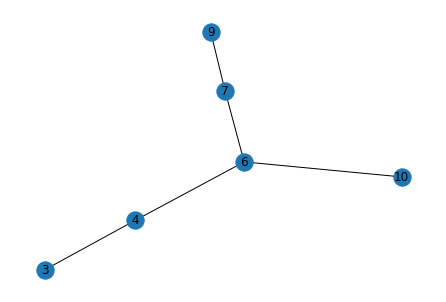

In [ ]:
nx.draw(G, with_labels=True)

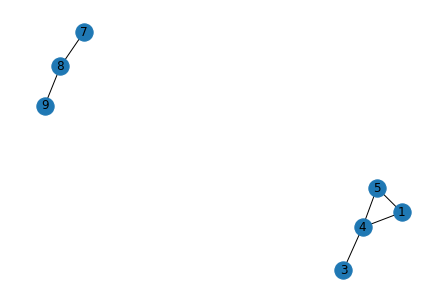

In [ ]:
nx.draw(G1, with_labels=True)

In [ ]:
def DFS(G, v, visited, init_node):
    # mark node v as visited
    visited[v] = True
    # iter all adjacent vertex of v
    for node in G.neighbors(v):
        # if node not visited, recurse DFS on node
        if visited[node] == False:
            # it will return false if the node is a leaf
            if DFS(G, node, visited, v):
                return True
        # if an adjacent vertex of node is already visited
        # and also is not node's parent, it means that 
        # there is a cycle in the graph
        elif node != init_node:
            return True
    return False


In [ ]:
visited = dict.fromkeys(list(G.nodes), False)
res = 1
nodes = list(G.nodes)
for n in nodes:
    if visited[n] == False:
        if DFS(G, n, visited, -1) == True:
            res = 'Cycle found! Assignment not possible'
print(res)

1


In [ ]:
visited1 = dict.fromkeys(list(G1.nodes), False)
res1 = 1
nodes1 = list(G1.nodes)
for n in nodes1:
    if visited1[n] == False:
        if DFS(G1, n, visited1, -1) == True:
            res1 = 'Cycle found! Assignment not possible'
print(res1)

Cycle found! Assignment not possible
